*   Nama: Tuti Amalia
*   Email: amalia.tuti111@gmail.com
*   Asal: Kabupaten Gowa
*   Dataset yang digunakan: https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset


Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential

Download Dataset

In [3]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WbmK6pJfEpJZw-dvWNmzRl0SssX67vv8'  \
  -O 'archive.zip'

--2021-08-09 01:46:38--  https://drive.google.com/uc?export=download&id=1WbmK6pJfEpJZw-dvWNmzRl0SssX67vv8
Resolving drive.google.com (drive.google.com)... 142.250.141.138, 142.250.141.102, 142.250.141.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1qi8iiufvp7r4ql3ql6gmg9g2qgki7k5/1628473575000/12137666749112449155/*/1WbmK6pJfEpJZw-dvWNmzRl0SssX67vv8?e=download [following]
--2021-08-09 01:46:39--  https://doc-04-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1qi8iiufvp7r4ql3ql6gmg9g2qgki7k5/1628473575000/12137666749112449155/*/1WbmK6pJfEpJZw-dvWNmzRl0SssX67vv8?e=download
Resolving doc-04-9g-docs.googleusercontent.com (doc-04-9g-docs.googleusercontent.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to doc-04-9g-docs.googleusercontent.com (d

In [4]:
# melakukan ekstraksi pada file zip
import zipfile,os
fileZip = 'archive.zip'
zipRef = zipfile.ZipFile(fileZip, 'r')
zipRef.extractall('')
zipRef.close()

In [5]:
df=pd.read_csv('/content/london_merged.csv',parse_dates=['timestamp'],index_col='timestamp')
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
#cek apakah ada data yang kosong
df.isnull().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

Visualisasi Data

In [7]:
df.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season'],
      dtype='object')

In [8]:
# Memilih fitur numerik dari kumpulan data

numerical_df = df.select_dtypes(exclude='object')

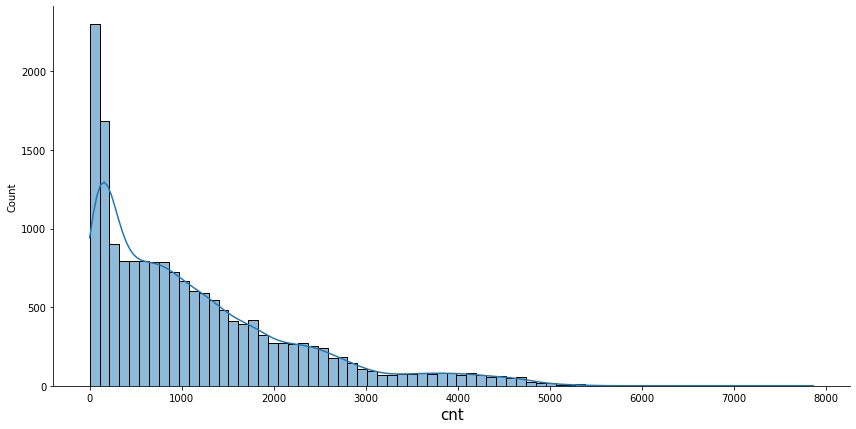

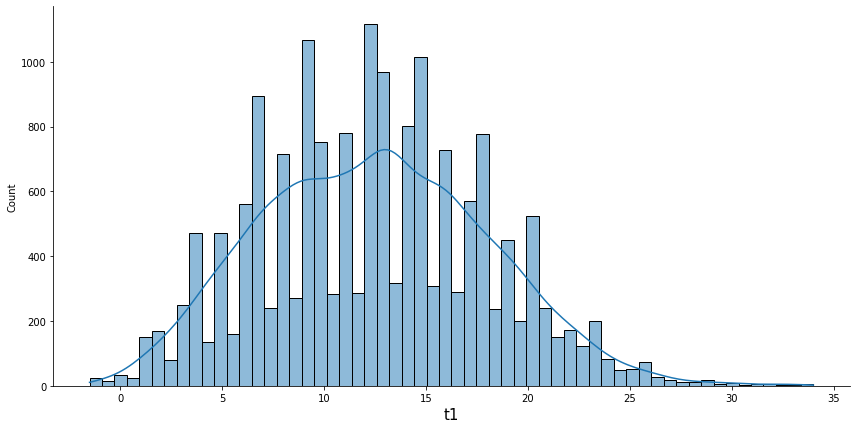

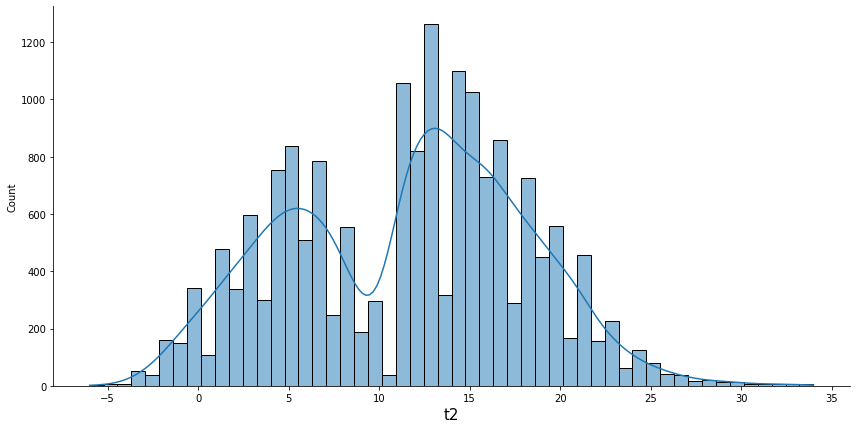

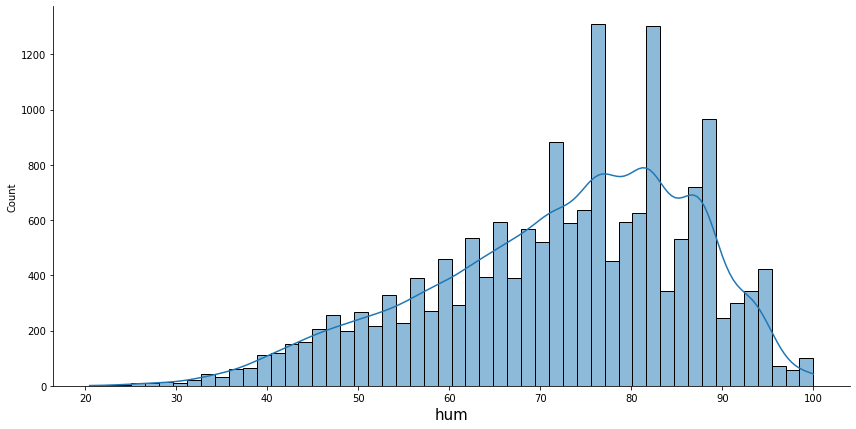

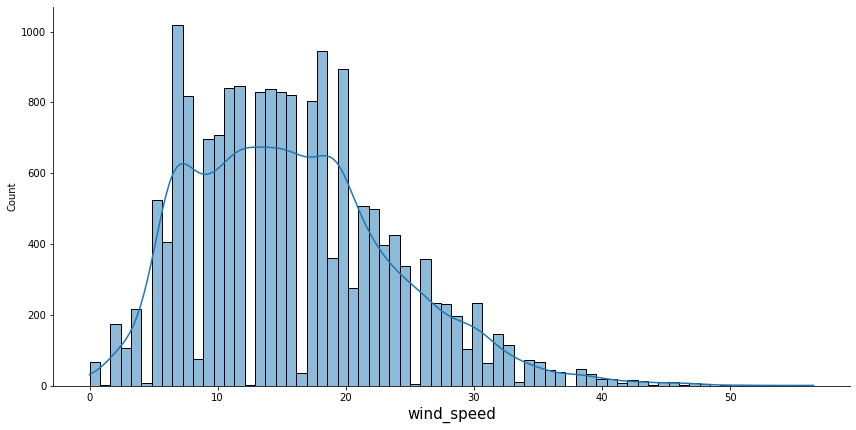

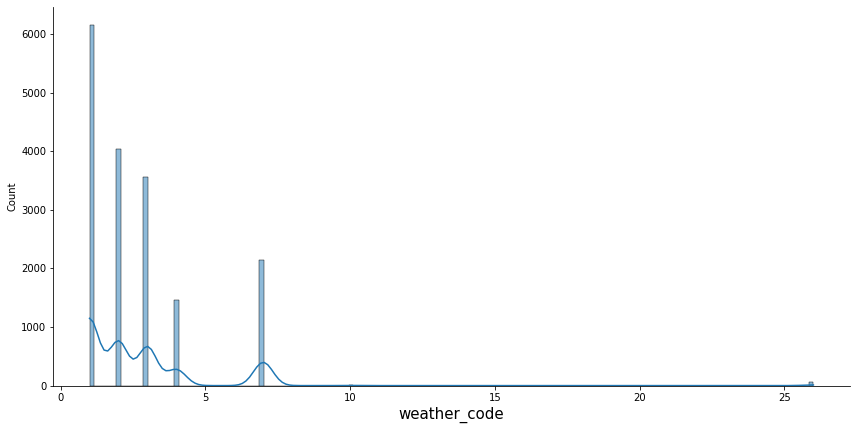

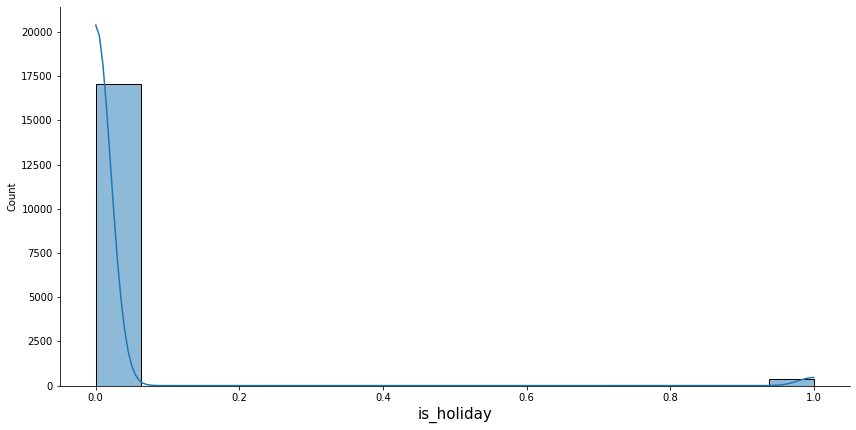

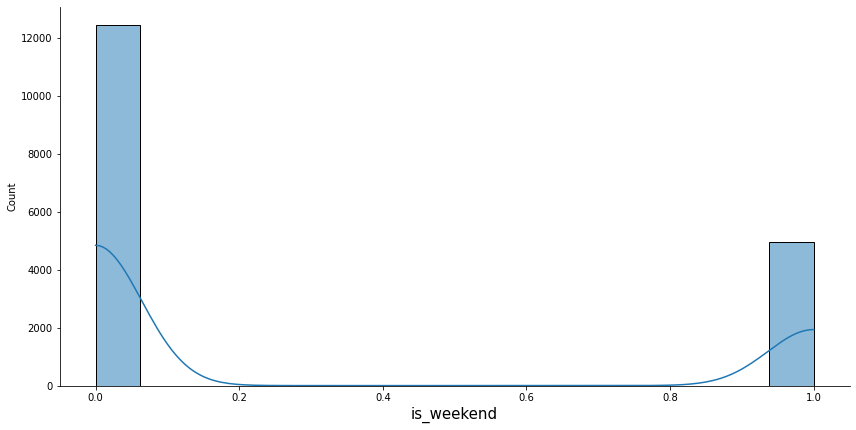

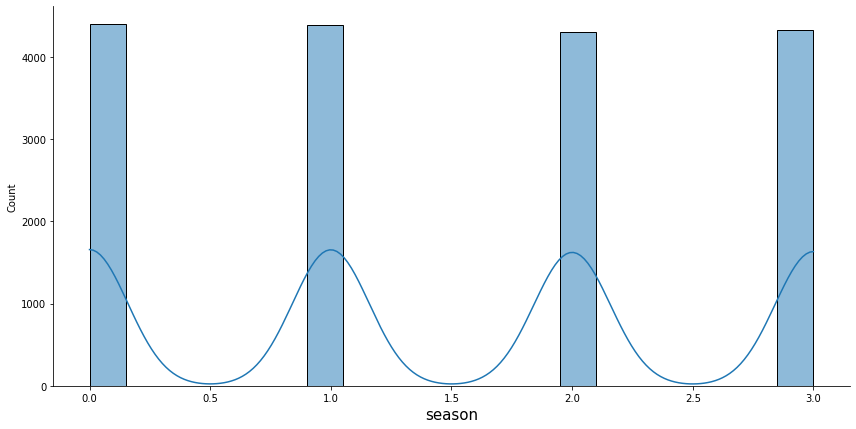

In [9]:
# Memvisualisasikan semua fitur numerik

for i in numerical_df:
  sns.displot(x = i, data = df, height = 6, aspect = 2, kde = True);
  plt.xlabel(i, fontsize = 15)

In [10]:
# mengambil data waktu tertentu seperti jam, hari, bulan, atau tahun.

df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day,month
timestamp,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,1


In [30]:
# # Memisahkan atribut train dan label
# X = df.drop('cnt', axis = 1).values
# y = df['cnt'].values

In [31]:
# X = np.array(X)
# y = np.array(y).reshape(-1,1)

In [11]:
# Scaling MinMaxScaler
def datasequences(data, window_size=1):
  X = []
  y = []
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled = scaler.fit_transform(data)
  for i in range(len(data)-window_size):
    X.append(scaled[i:i+window_size])
    y.append(data['cnt'].iloc[i+window_size])
  return X, y, scaler

In [12]:
X,y, scaler= datasequences(df, window_size=24)
y = list(np.float_(y))
print(y)
print(np.array(y).shape)
print(np.array(X).shape)
print(np.array(y).dtype)
print(np.array(X).dtype)

[83.0, 67.0, 32.0, 22.0, 38.0, 81.0, 444.0, 1597.0, 3161.0, 1342.0, 568.0, 584.0, 762.0, 873.0, 672.0, 807.0, 1192.0, 2761.0, 2389.0, 1274.0, 696.0, 411.0, 324.0, 192.0, 91.0, 73.0, 33.0, 19.0, 40.0, 74.0, 530.0, 1715.0, 3534.0, 1573.0, 635.0, 550.0, 395.0, 426.0, 579.0, 718.0, 1184.0, 2662.0, 2610.0, 1402.0, 720.0, 494.0, 344.0, 212.0, 102.0, 60.0, 33.0, 26.0, 33.0, 80.0, 526.0, 1757.0, 3618.0, 1714.0, 763.0, 690.0, 913.0, 982.0, 783.0, 794.0, 1171.0, 2647.0, 2579.0, 657.0, 516.0, 414.0, 206.0, 123.0, 56.0, 51.0, 33.0, 32.0, 87.0, 511.0, 982.0, 1228.0, 573.0, 185.0, 193.0, 522.0, 672.0, 761.0, 781.0, 1212.0, 2351.0, 2110.0, 1239.0, 752.0, 457.0, 423.0, 267.0, 147.0, 60.0, 65.0, 42.0, 47.0, 85.0, 441.0, 1593.0, 3505.0, 1768.0, 799.0, 806.0, 1052.0, 1078.0, 976.0, 912.0, 1229.0, 2409.0, 1983.0, 1094.0, 686.0, 443.0, 464.0, 420.0, 392.0, 277.0, 189.0, 153.0, 90.0, 52.0, 69.0, 143.0, 321.0, 619.0, 757.0, 800.0, 1191.0, 1395.0, 1358.0, 1436.0, 1270.0, 1054.0, 849.0, 720.0, 556.0, 349.0, 33

In [13]:
# Split data training set dan validation set dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size = 0.2, shuffle= False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13912, 24, 12), (3478, 24, 12), (13912,), (3478,))

In [15]:
# Arsitektur Model
model = Sequential([
                    tf.keras.layers.LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True),
                    tf.keras.layers.LSTM(100),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(30, activation="relu"),
                    tf.keras.layers.Dense(1),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 24, 100)           45200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 128,661
Trainable params: 128,661
Non-trainable params: 0
_________________________________________________________________


In [16]:
mae = (df['cnt'].max() - df['cnt'].min()) * 10/100
print(mae)

786.0


In [17]:
# Inisiasi fungsi callback dengan syarat akurasi 90%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('mae')< mae:
      print('\nMAE telah mencapai <10%!')
      self.model.stop_training = True

# Inisiasi class myCallback ke dalam variable callbacks
callbacks = myCallback()

In [18]:
# Compile Model
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=optimizer,
    metrics=["mae"])

In [19]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_test,
                     y_test),
    callbacks=callbacks,
    verbose=1)

Epoch 1/50
435/435 [==============================] - 12s 8ms/step - loss: 1130.2402 - mae: 1130.7402 - val_loss: 1175.7014 - val_mae: 1176.2014
Epoch 2/50
435/435 [==============================] - 3s 6ms/step - loss: 976.8046 - mae: 977.3044 - val_loss: 848.6243 - val_mae: 849.1241
Epoch 3/50
435/435 [==============================] - 3s 7ms/step - loss: 809.7612 - mae: 810.2610 - val_loss: 841.0470 - val_mae: 841.5469
Epoch 4/50
435/435 [==============================] - 3s 7ms/step - loss: 808.2766 - mae: 808.7764 - val_loss: 842.0999 - val_mae: 842.5997
Epoch 5/50
435/435 [==============================] - 3s 7ms/step - loss: 808.6939 - mae: 809.1938 - val_loss: 840.6666 - val_mae: 841.1664
Epoch 6/50
435/435 [==============================] - 3s 7ms/step - loss: 810.2343 - mae: 810.7342 - val_loss: 840.6268 - val_mae: 841.1265
Epoch 7/50
435/435 [==============================] - 3s 7ms/step - loss: 807.9098 - mae: 808.4097 - val_loss: 839.9510 - val_mae: 840.4507
Epoch 8/50
435/

Plotting

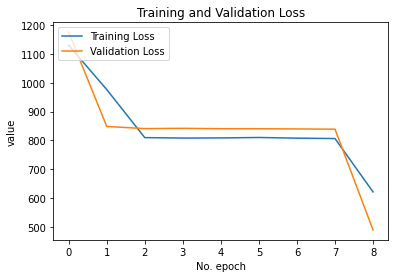

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

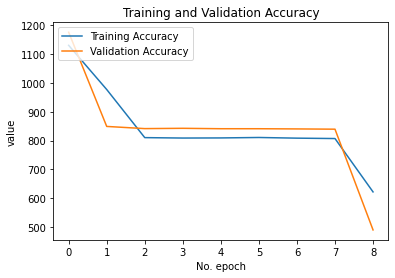

In [21]:
plt.plot(history.history['mae'], label='Training Accuracy')
plt.plot(history.history['val_mae'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()